## Step 1: Data Preparation

In [ ]:
import os

print(f"Previous exec path: {os.getcwd()}")
# move two level up
os.chdir("../../")
print(f"Current exec path: {os.getcwd()}")

from source.utils.dot2polygon import dot2polygon
import glob
import yaml
import matplotlib.pyplot as plt

Previous exec path: /workspace/source/notebooks
Current exec path: /workspace


In [2]:
# make a folder for converted annotations
output_root = r"./data/monkey-data/annotations_polygon"
if not (os.path.isdir(output_root)):
    os.mkdir(output_root)

Convert the dot annotation to polygon bounding boxes

In [3]:
# TODO: check those values because in the eval they changed the numbers!
lymphocyte_half_box_size = (
    4.5  # the size of half of the bbox around the lymphocyte dot in um
)
# NOTE: reduced this to 5.0 as the eval script (it was 11.0)
monocytes_half_box_size = (
    5.0  # the size of half of the bbox around the monocytes dot in um
)
min_spacing = 0.25  # NOTE: in the eval code they use 0.24199951445730394
# spacing is the zoom level of the image, in micro-meters per pixel (was rounded to 0.25)

In [5]:
# convert dot annotations to polygon, single image

# xml_path = r'./data/monkey-data/annotations/xml/A_P000001.xml'
# output_path = r'./data/monkey-data/annotations_polygon/A_P000001_polygon.xml'

# convert the dot annotations (in mm) to polygon bounding boxes
# dot2polygon(xml_path, lymphocyte_half_box_size, monocytes_half_box_size, min_spacing, output_path)

In [6]:
# convert dot annotations to polygon, in a folder

annotation_dir = r"./data/monkey-data/annotations/xml"
annotation_polygon_dir = r"./data/monkey-data/annotations_polygon"
annotation_list = glob.glob(os.path.join(annotation_dir, "*.xml"))

print(annotation_list)
for xml_path in annotation_list:
    print(xml_path)
    output_path = os.path.join(
        annotation_polygon_dir,
        os.path.splitext(os.path.basename(xml_path))[0]
        + "_polygon"
        + os.path.splitext(os.path.basename(xml_path))[1],
    )
    print(output_path)
    # lymphocyte_half_box_size = 4.5 # the size of half of the bbox around the lymphocyte dot in um
    # monocytes_half_box_size = 11.0 # the size of half of the bbox around the monocytes dot in um
    # min_spacing = 0.25
    dot2polygon(
        xml_path,
        lymphocyte_half_box_size,
        monocytes_half_box_size,
        min_spacing,
        output_path,
    )

['./data/monkey-data/annotations/xml/D_P000018.xml', './data/monkey-data/annotations/xml/B_P000019.xml', './data/monkey-data/annotations/xml/A_P000033.xml', './data/monkey-data/annotations/xml/D_P000012.xml', './data/monkey-data/annotations/xml/D_P000013.xml', './data/monkey-data/annotations/xml/A_P000017.xml', './data/monkey-data/annotations/xml/A_P000030.xml', './data/monkey-data/annotations/xml/C_P000022.xml', './data/monkey-data/annotations/xml/C_P000021.xml', './data/monkey-data/annotations/xml/C_P000036.xml', './data/monkey-data/annotations/xml/B_P000016.xml', './data/monkey-data/annotations/xml/D_P000011.xml', './data/monkey-data/annotations/xml/C_P000023.xml', './data/monkey-data/annotations/xml/A_P000004.xml', './data/monkey-data/annotations/xml/D_P000010.xml', './data/monkey-data/annotations/xml/B_P000014.xml', './data/monkey-data/annotations/xml/A_P000020.xml', './data/monkey-data/annotations/xml/B_P000002.xml', './data/monkey-data/annotations/xml/C_P000033.xml', './data/mon

Creating the yaml config files for training.

In [7]:
def folders_to_yml(wsi_dir: str, wsa_dir: str, output_dir: str, output_name: str):
    """
    Generate a yaml file to be used as WSD dataconfig from a folder of slides and a folder of annotation or mask files.
    Assumes files use the same name for both the slides and masks.
    """

    wsa_list = glob.glob(wsa_dir)

    yaml_dict = {"training": []}
    # yaml_dict = {'training': [], 'validation': []}
    for wsa in wsa_list:
        patient_name = os.path.basename(wsa).split(
            os.path.basename(wsa_dir).split("*")[1]
        )[0]  # monocytes
        #     print(patient_name)
        if os.path.isfile(os.path.join(wsi_dir, patient_name + "_PAS_CPG.tif")):
            wsi = os.path.join(wsi_dir, patient_name + "_PAS_CPG.tif")
            print("match found:    ", patient_name)
            yaml_dict["training"].append(
                {"wsa": {"path": str(wsa)}, "wsi": {"path": str(wsi)}}
            )

            # # validation if needed
            # yaml_dict['validation'].append(
            #         {"wsa": {"path": str(wsa)}, "wsi": {"path": str(wsi)}})

        else:
            print("no match found:    ", patient_name)

    # make a folder for output
    if not (os.path.isdir(output_dir)):
        os.mkdir(output_dir)

    with open(os.path.join(output_dir, output_name), "w") as file:
        yaml.safe_dump(yaml_dict, file)

In [8]:
wsi_dir = r"./data/monkey-data/images/pas-cpg"  # r'./data_debug/images/pas-cpg'
wsa_dir = r"./data/monkey-data/annotations_polygon/*_polygon.xml"
output_dir = r"./source/configs"
output_name = "training_full.yml"

folders_to_yml(wsi_dir, wsa_dir, output_dir, output_name)

match found:     B_P000004
match found:     D_P000011
match found:     B_P000005
match found:     A_P000036
match found:     A_P000001
match found:     D_P000004
match found:     A_P000011
match found:     C_P000031
match found:     A_P000029
match found:     D_P000010
match found:     C_P000033
match found:     A_P000035
match found:     D_P000015
match found:     C_P000036
match found:     A_P000006
match found:     A_P000018
match found:     B_P000003
match found:     B_P000016
match found:     A_P000034
match found:     C_P000037
match found:     D_P000002
match found:     B_P000007
match found:     B_P000015
match found:     D_P000001
match found:     D_P000009
match found:     A_P000004
match found:     C_P000023
match found:     A_P000003
match found:     A_P000005
match found:     A_P000014
match found:     C_P000035
match found:     C_P000024
match found:     D_P000016
match found:     C_P000038
match found:     B_P000020
match found:     D_P000007
match found:     C_P000039
m

## Data Preparation Using WSI Metadatas

In [ ]:
from source.utils.config_parser import get_args_and_config
import pandas as pd
os.chdir("source")

args, config = get_args_and_config()

2024-12-23 11:37:55,042 - INFO - argparser - 
Trying to load configuration file from specified or default '--config' args...
2024-12-23 11:37:55,056 - INFO - argparser - Loaded configuration from ./configs/baseline/detectron2_baseline.yml:
2024-12-23 11:37:55,060 - INFO - argparser - Load of args and config completed!
Loaded the following args:
{   'config': './configs/baseline/detectron2_baseline.yml',
    'debug': False,
    'train': True,
    'use_wandb': True}
Loaded the following configs:
{   'dataset': {   'annotation_polygon_dir': 'annotations_polygon',
                   'lymphocyte_half_box_size': 4.5,
                   'min_spacing': 0.25,
                   'monocytes_half_box_size': 5.0,
                   'name': 'monkey_dataset',
                   'path': '../data/monkey-data',
                   'yaml_wsi_wsa_path': './configs/training_full.yml'},
    'model': {'name': 'detectron2'},
    'optimizer': None,
    'other': None,
    'project': {   'continue_training': Fals

In [4]:
dataset_config = config["dataset"]
dataset_config

{'name': 'monkey_dataset',
 'path': '../data/monkey-data',
 'annotation_polygon_dir': 'annotations_polygon',
 'yaml_wsi_wsa_path': './configs/training_full.yml',
 'lymphocyte_half_box_size': 4.5,
 'monocytes_half_box_size': 5.0,
 'min_spacing': 0.25}

In [5]:
dataset_path = dataset_config["path"]
dataset_annotation_path = os.path.join(
    dataset_path, dataset_config["annotation_polygon_dir"]
)
metadata_file = os.path.join(dataset_path, "metadata", "context-information.xlsx")

In [6]:
#!pip install openpyxl
metadata_df = pd.read_excel(metadata_file, index_col=0)
# remove index
metadata_df.reset_index(drop=True, inplace=True)
metadata_df.head(3)

,Slide ID,Lab,Diagnosis,CD3CD20_IHC_quality,PU.1_IHC_quality,IR_CPG-IHC,IR_CPG-Diagnostic,IR_CPG-Original,Nb_lymphocytes,Nb_monocytes,Nb_rois
0,A_P000001,Radboud,TCMR 2B,Good,"Acceptable, strong PU1 intenisty with also bac...",Good,x,x,485,1185,2
1,A_P000002,Radboud,Borderline rejection (Mild ptc and focally sus...,Good,"Acceptable, strong PU1 intenisty with also bac...",Good,x,x,1063,214,1
2,A_P000003,Radboud,TCMR IB (Severe ptc and tubulitis),Good,"Good, moderate PU1 intensity",Good,x,x,549,265,1


In [11]:
from tqdm import tqdm

dataset_path = dataset_config["path"]
dataset_annotation_path = os.path.join(
    dataset_path, dataset_config["annotation_polygon_dir"]
)

import glob


def create_dataset_df(dataset_path: str, annotations_path: str):
    """
    Creates and updates a metadata DataFrame by mapping WSI image files and
    annotation files to corresponding patient IDs.

    Args:
        dataset_path (str): Path to the dataset directory containing images and metadata.
        annotations_path (str): Path to the directory containing annotation polygon files.

    Returns:
        pd.DataFrame: Updated metadata DataFrame with paths to the relevant WSI images
                      and annotation files for each patient.

    Workflow:
        1. Load and preprocess the metadata DataFrame.
        2. Identify annotation files and corresponding WSI image files.
        3. Update the metadata DataFrame with paths to the matched WSI and annotation files.
        4. Log progress using a progress bar.
    """
    # Load metadata file
    metadata_file = os.path.join(dataset_path, "metadata", "context-information.xlsx")
    metadata_df = pd.read_excel(metadata_file, index_col=0)

    # Preprocess the metadata DataFrame
    metadata_df.reset_index(drop=True, inplace=True)  # Remove the index column
    metadata_df.replace("x", "Not available", inplace=True)  # Replace placeholders

    # Define directories for annotation and image files
    wsa_dir = f"{annotations_path}" + r"/*_polygon.xml"  # Annotation files
    wsi_pas_cpg_dir = os.path.join(dataset_path, "images", "pas-cpg")  # PAS_CPG images
    wsi_ihc_dir = os.path.join(dataset_path, "images", "ihc")  # IHC images
    wsi_diagnostic_dir = os.path.join(
        dataset_path, "images", "pas-diagnostic"
    )  # PAS Diagnostic
    wsi_original_dir = os.path.join(
        dataset_path, "images", "pas-original"
    )  # PAS Original

    # List of annotation files
    wsa_list = glob.glob(wsa_dir)

    # Initialize a progress bar for processing annotation files
    progress_bar = tqdm(wsa_list, desc="Processing WSAs")

    # Iterate through each annotation file
    for wsa in progress_bar:
        # Extract patient name from the annotation file name
        patient_name = os.path.basename(wsa).split(
            os.path.basename(wsa_dir).split("*")[1]
        )[0]

        # Check if the PAS_CPG image exists for the patient
        pas_cpg_path = os.path.join(wsi_pas_cpg_dir, patient_name + "_PAS_CPG.tif")
        if os.path.isfile(pas_cpg_path):
            progress_bar.set_description(
                f"Processing {patient_name}"
            )  # Update progress bar

            # Update metadata DataFrame with paths for PAS_CPG image and annotation
            metadata_df.loc[
                metadata_df["Slide ID"] == patient_name, "WSI PAS_CPG Path"
            ] = pas_cpg_path
            metadata_df.loc[
                metadata_df["Slide ID"] == patient_name, ""
            ] = wsa

            # Check and update for IHC image
            ihc_path = os.path.join(wsi_ihc_dir, patient_name + "_IHC_CPG.tif")
            if os.path.isfile(ihc_path):
                metadata_df.loc[
                    metadata_df["Slide ID"] == patient_name, "WSI IHC_CPG Path"
                ] = ihc_path

            # Check and update for PAS-Diagnostic image
            pas_diagnostic_path = os.path.join(
                wsi_diagnostic_dir, patient_name + "_PAS_Diagnostic.tif"
            )
            if os.path.isfile(pas_diagnostic_path):
                metadata_df.loc[
                    metadata_df["Slide ID"] == patient_name, "WSI PAS_Diagnostic Path"
                ] = pas_diagnostic_path

            # Check and update for PAS-Original image
            pas_original_path = os.path.join(
                wsi_original_dir, patient_name + "_PAS_Original.tif"Annotation Path
            )
            if os.path.isfile(pas_original_path):
                metadata_df.loc[
                    metadata_df["Slide ID"] == patient_name, "WSI PAS_Original Path"
                ] = pas_original_path
        else:
            # Log if no match is found for the patient
            print("No match found:    ", patient_name)

    return metadata_df


dataset_df = create_dataset_df(dataset_path, dataset_annotation_path)
dataset_df.head(3)

Processing C_P000030: 100%|██████████| 81/81 [00:00<00:00, 229.09it/s]


,Slide ID,Lab,Diagnosis,CD3CD20_IHC_quality,PU.1_IHC_quality,IR_CPG-IHC,IR_CPG-Diagnostic,IR_CPG-Original,Nb_lymphocytes,Nb_monocytes,Nb_rois,WSI PAS_CPG Path,Annotation Path,WSI IHC_CPG Path,WSI PAS_Diagnostic Path,WSI PAS_Original Path
0,A_P000001,Radboud,TCMR 2B,Good,"Acceptable, strong PU1 intenisty with also bac...",Good,Not available,Not available,485,1185,2,../data/monkey-data/images/pas-cpg/A_P000001_P...,../data/monkey-data/annotations_polygon/A_P000...,../data/monkey-data/images/ihc/A_P000001_IHC_C...,NaN,NaN
1,A_P000002,Radboud,Borderline rejection (Mild ptc and focally sus...,Good,"Acceptable, strong PU1 intenisty with also bac...",Good,Not available,Not available,1063,214,1,../data/monkey-data/images/pas-cpg/A_P000002_P...,../data/monkey-data/annotations_polygon/A_P000...,../data/monkey-data/images/ihc/A_P000002_IHC_C...,NaN,NaN
2,A_P000003,Radboud,TCMR IB (Severe ptc and tubulitis),Good,"Good, moderate PU1 intensity",Good,Not available,Not available,549,265,1,../data/monkey-data/images/pas-cpg/A_P000003_P...,../data/monkey-data/annotations_polygon/A_P000...,../data/monkey-data/images/ihc/A_P000003_IHC_C...,NaN,NaN


In [47]:
from sklearn.model_selection import StratifiedKFold, KFold


import pandas as pd
import os
import yaml
from sklearn.model_selection import StratifiedKFold, KFold

def split_and_save_kfold(
    dataset_df: pd.DataFrame,
    n_folds=5,
    wsi_col="WSI PAS_CPG Path",
    wsa_col="Annotation Path",
    balance_by=None,
    output_dir="./configs/splits",
    seed=42,
):
    """
    Split the data into n folds, save to .yml files with training and validation keys,
    and add fold ID to the dataframe.

    Parameters:
        dataset_df (pd.DataFrame): The input dataframe with WSI paths and metadata.
        n_folds (int): Number of folds for the split.
        wsi_col (str): Column name for the WSI paths.
        wsa_col (str): Column name for the annotation paths.
        balance_by (str or None): Column to balance the split ('class' or 'immune_cells').
        output_dir (str): Directory to save the generated .yml files.

    Returns:
        pd.DataFrame: The input dataframe with an additional 'fold_id' column.
    """
    # Make the output directory if not present
    os.makedirs(output_dir, exist_ok=True)

    # Add a fold_id column initialized to -1
    dataset_df = dataset_df.copy()
    dataset_df["fold_id"] = -1

    # Choose the splitter
    if balance_by and balance_by in dataset_df.columns:
        skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=seed)
        stratify_col = dataset_df[balance_by]
    else:
        # Use random non-stratified splitter if no column is specified
        skf = KFold(n_splits=n_folds, shuffle=True, random_state=seed)
        stratify_col = None

    # Split the data
    for fold, (train_idx, test_idx) in enumerate(skf.split(dataset_df, stratify_col)):
        train_data = dataset_df.iloc[train_idx]
        validation_data = dataset_df.iloc[test_idx]

        # Assign fold IDs to the dataframe
        dataset_df.loc[test_idx, "fold_id"] = fold

        # Format data for YAML
        train_yaml = [
            {"wsa": {"path": row[wsa_col]}, "wsi": {"path": row[wsi_col]}}
            for _, row in train_data.iterrows()
        ]
        validation_yaml = [
            {"wsa": {"path": row[wsa_col]}, "wsi": {"path": row[wsi_col]}}
            for _, row in validation_data.iterrows()
        ]

        fold_type = f"balanced_{balance_by}_" if balance_by else ""
        # Save YAML files
        fold_file = os.path.join(output_dir, f"fold_{fold_type}{fold}.yml")
        with open(fold_file, "w") as f:
            yaml.dump({"training": train_yaml, "validation": validation_yaml}, f)

        print(f"Fold {fold + 1} saved -> {fold_file}")

    return dataset_df



Fold 1 saved -> ./configs/splits/fold_0.yml
Fold 2 saved -> ./configs/splits/fold_1.yml
Fold 3 saved -> ./configs/splits/fold_2.yml
Fold 4 saved -> ./configs/splits/fold_3.yml
Fold 5 saved -> ./configs/splits/fold_4.yml


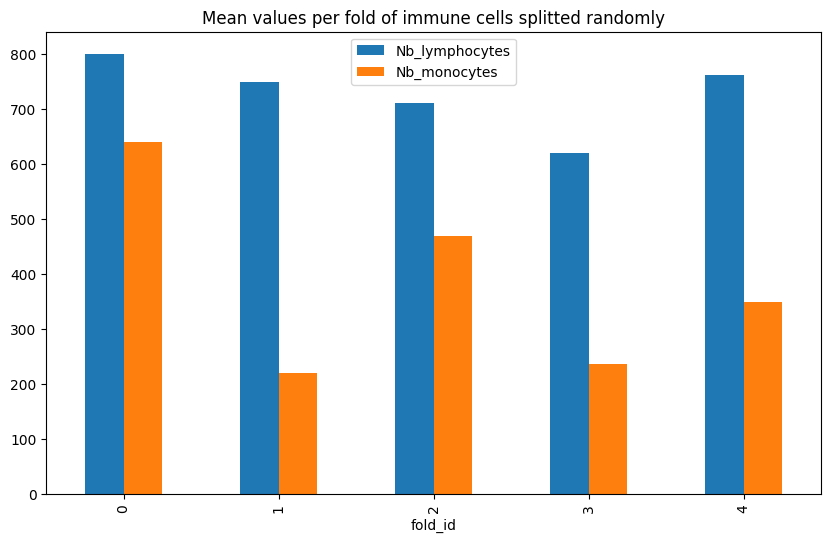

In [46]:
dataset_df_random_splits = split_and_save_kfold(
    dataset_df, n_folds=5, balance_by=None, output_dir="./configs/splits"
)

dataset_df_random_splits.groupby("fold_id")[
    ["Nb_lymphocytes", "Nb_monocytes"]
].mean().plot(kind="bar", figsize=(10, 6), title="Mean values per fold of immune cells splitted randomly")
plt.show()

/venv/lib/python3.8/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Fold 1 saved -> ./configs/splits/fold_balanced_Diagnosis_0.yml
Fold 2 saved -> ./configs/splits/fold_balanced_Diagnosis_1.yml
Fold 3 saved -> ./configs/splits/fold_balanced_Diagnosis_2.yml
Fold 4 saved -> ./configs/splits/fold_balanced_Diagnosis_3.yml
Fold 5 saved -> ./configs/splits/fold_balanced_Diagnosis_4.yml


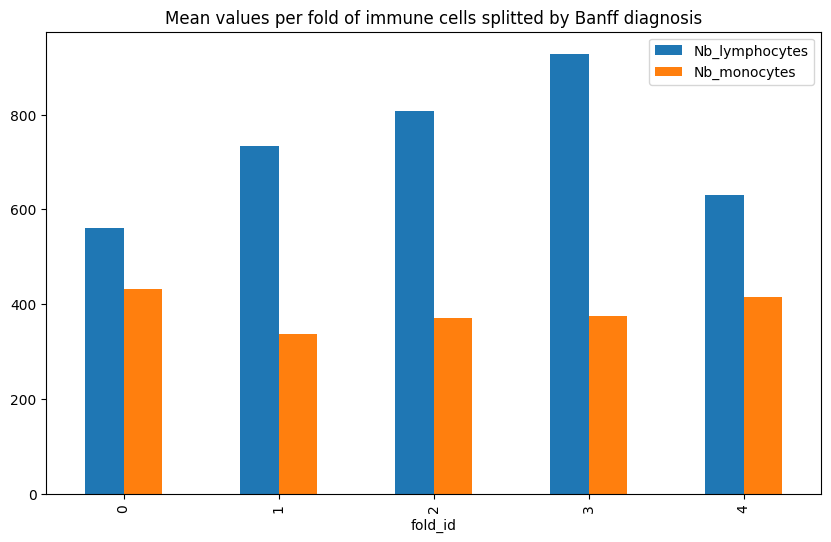

In [48]:
dataset_df_banff_splits = split_and_save_kfold(
    dataset_df, n_folds=5, balance_by="Diagnosis", output_dir="./configs/splits"
)

dataset_df_banff_splits.groupby("fold_id")[
    ["Nb_lymphocytes", "Nb_monocytes"]
].mean().plot(kind="bar", figsize=(10, 6), title="Mean values per fold of immune cells splitted by Banff diagnosis")
plt.show()

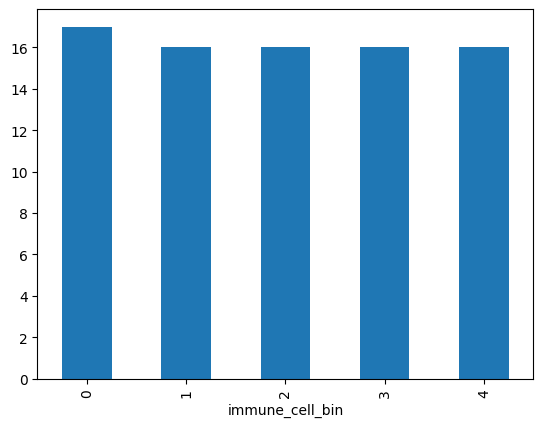

In [52]:
def create_quantile_bins(dataset_df, n_bins=5):
    """
    Create bins based on quantiles of the total cell count.

    Parameters:
        dataset_df (pd.DataFrame): The input dataframe.
        n_bins (int): Number of bins (quantiles).

    Returns:
        pd.DataFrame: The dataframe with a new 'immune_cell_bin' column.
    """
    dataset_df = dataset_df.copy()
    dataset_df["Total_cells"] = dataset_df["Nb_lymphocytes"] + dataset_df["Nb_monocytes"]
    
    dataset_df["immune_cell_bin"] = pd.qcut(
        dataset_df["Total_cells"], q=n_bins, labels=range(n_bins)
    )
    return dataset_df

dataset_df_cells_splits = create_quantile_bins(dataset_df, n_bins=5)

dataset_df_cells_splits["immune_cell_bin"].value_counts().plot(kind="bar")
plt.show()

Fold 1 saved -> ./configs/splits/fold_balanced_immune_cell_bin_0.yml
Fold 2 saved -> ./configs/splits/fold_balanced_immune_cell_bin_1.yml
Fold 3 saved -> ./configs/splits/fold_balanced_immune_cell_bin_2.yml
Fold 4 saved -> ./configs/splits/fold_balanced_immune_cell_bin_3.yml
Fold 5 saved -> ./configs/splits/fold_balanced_immune_cell_bin_4.yml


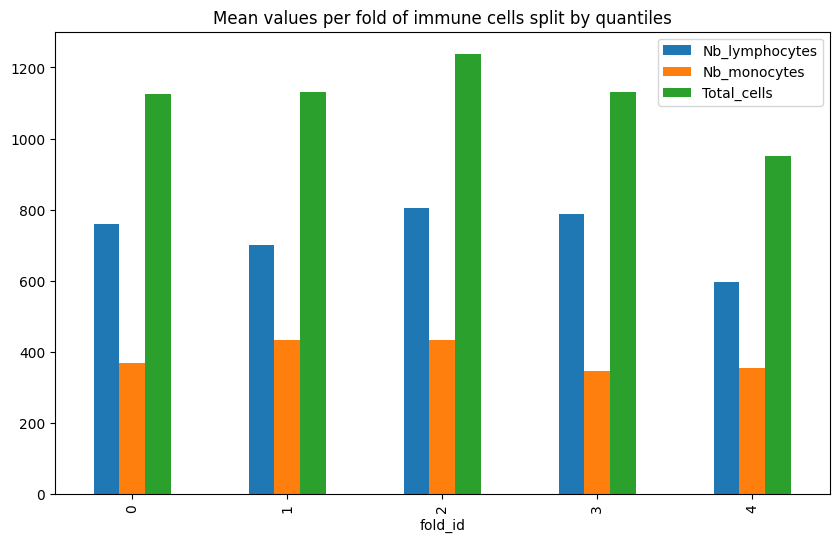

In [53]:
dataset_df_cells_splits = split_and_save_kfold(
    dataset_df_cells_splits,
    n_folds=5,
    balance_by="immune_cell_bin",
    output_dir="./configs/splits",
)

dataset_df_cells_splits.groupby("fold_id")[
    ["Nb_lymphocytes", "Nb_monocytes", "Total_cells"]
].mean().plot(
    kind="bar",
    figsize=(10, 6),
    title="Mean values per fold of immune cells split by quantiles",
)
plt.show()